In [1]:
import sys
sys.path.insert(0, "../src")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import cleaning

%reload_ext autoreload
%autoreload 2

In [2]:
df  = pd.read_csv("../datasets/raw/water_potability.csv")
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
df = cleaning.lowercase_columns(df)
df["potability"] = df["potability"].astype(bool)
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135       False  
1       15.180013        56.329076   4.500656       False  
2       16.868637        66.420093   3.055934       False  
3       18.436524       100.341674   4.628771       False  
4       11.558279        31.997993   4.075075       False

In [4]:
df = cleaning.drop_outliers(df, ["ph", "sulfate", "trihalomethanes"])
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   organic_carbon  trihalomethanes  turbidity  potability  
3       18.436524       100.341674   4.628771       False  
4       11.558279        31.997993   4.075075       False  
5        8.399735        54.917862   2.559708       False  
6       13.789695        84.603556   2.672989       False  
7       12.363817        62.798309   4.401425       False

In [5]:
df = cleaning.fill_missing_values(df, ["ph", "sulfate", "trihalomethanes"], "mean")
df.isna().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

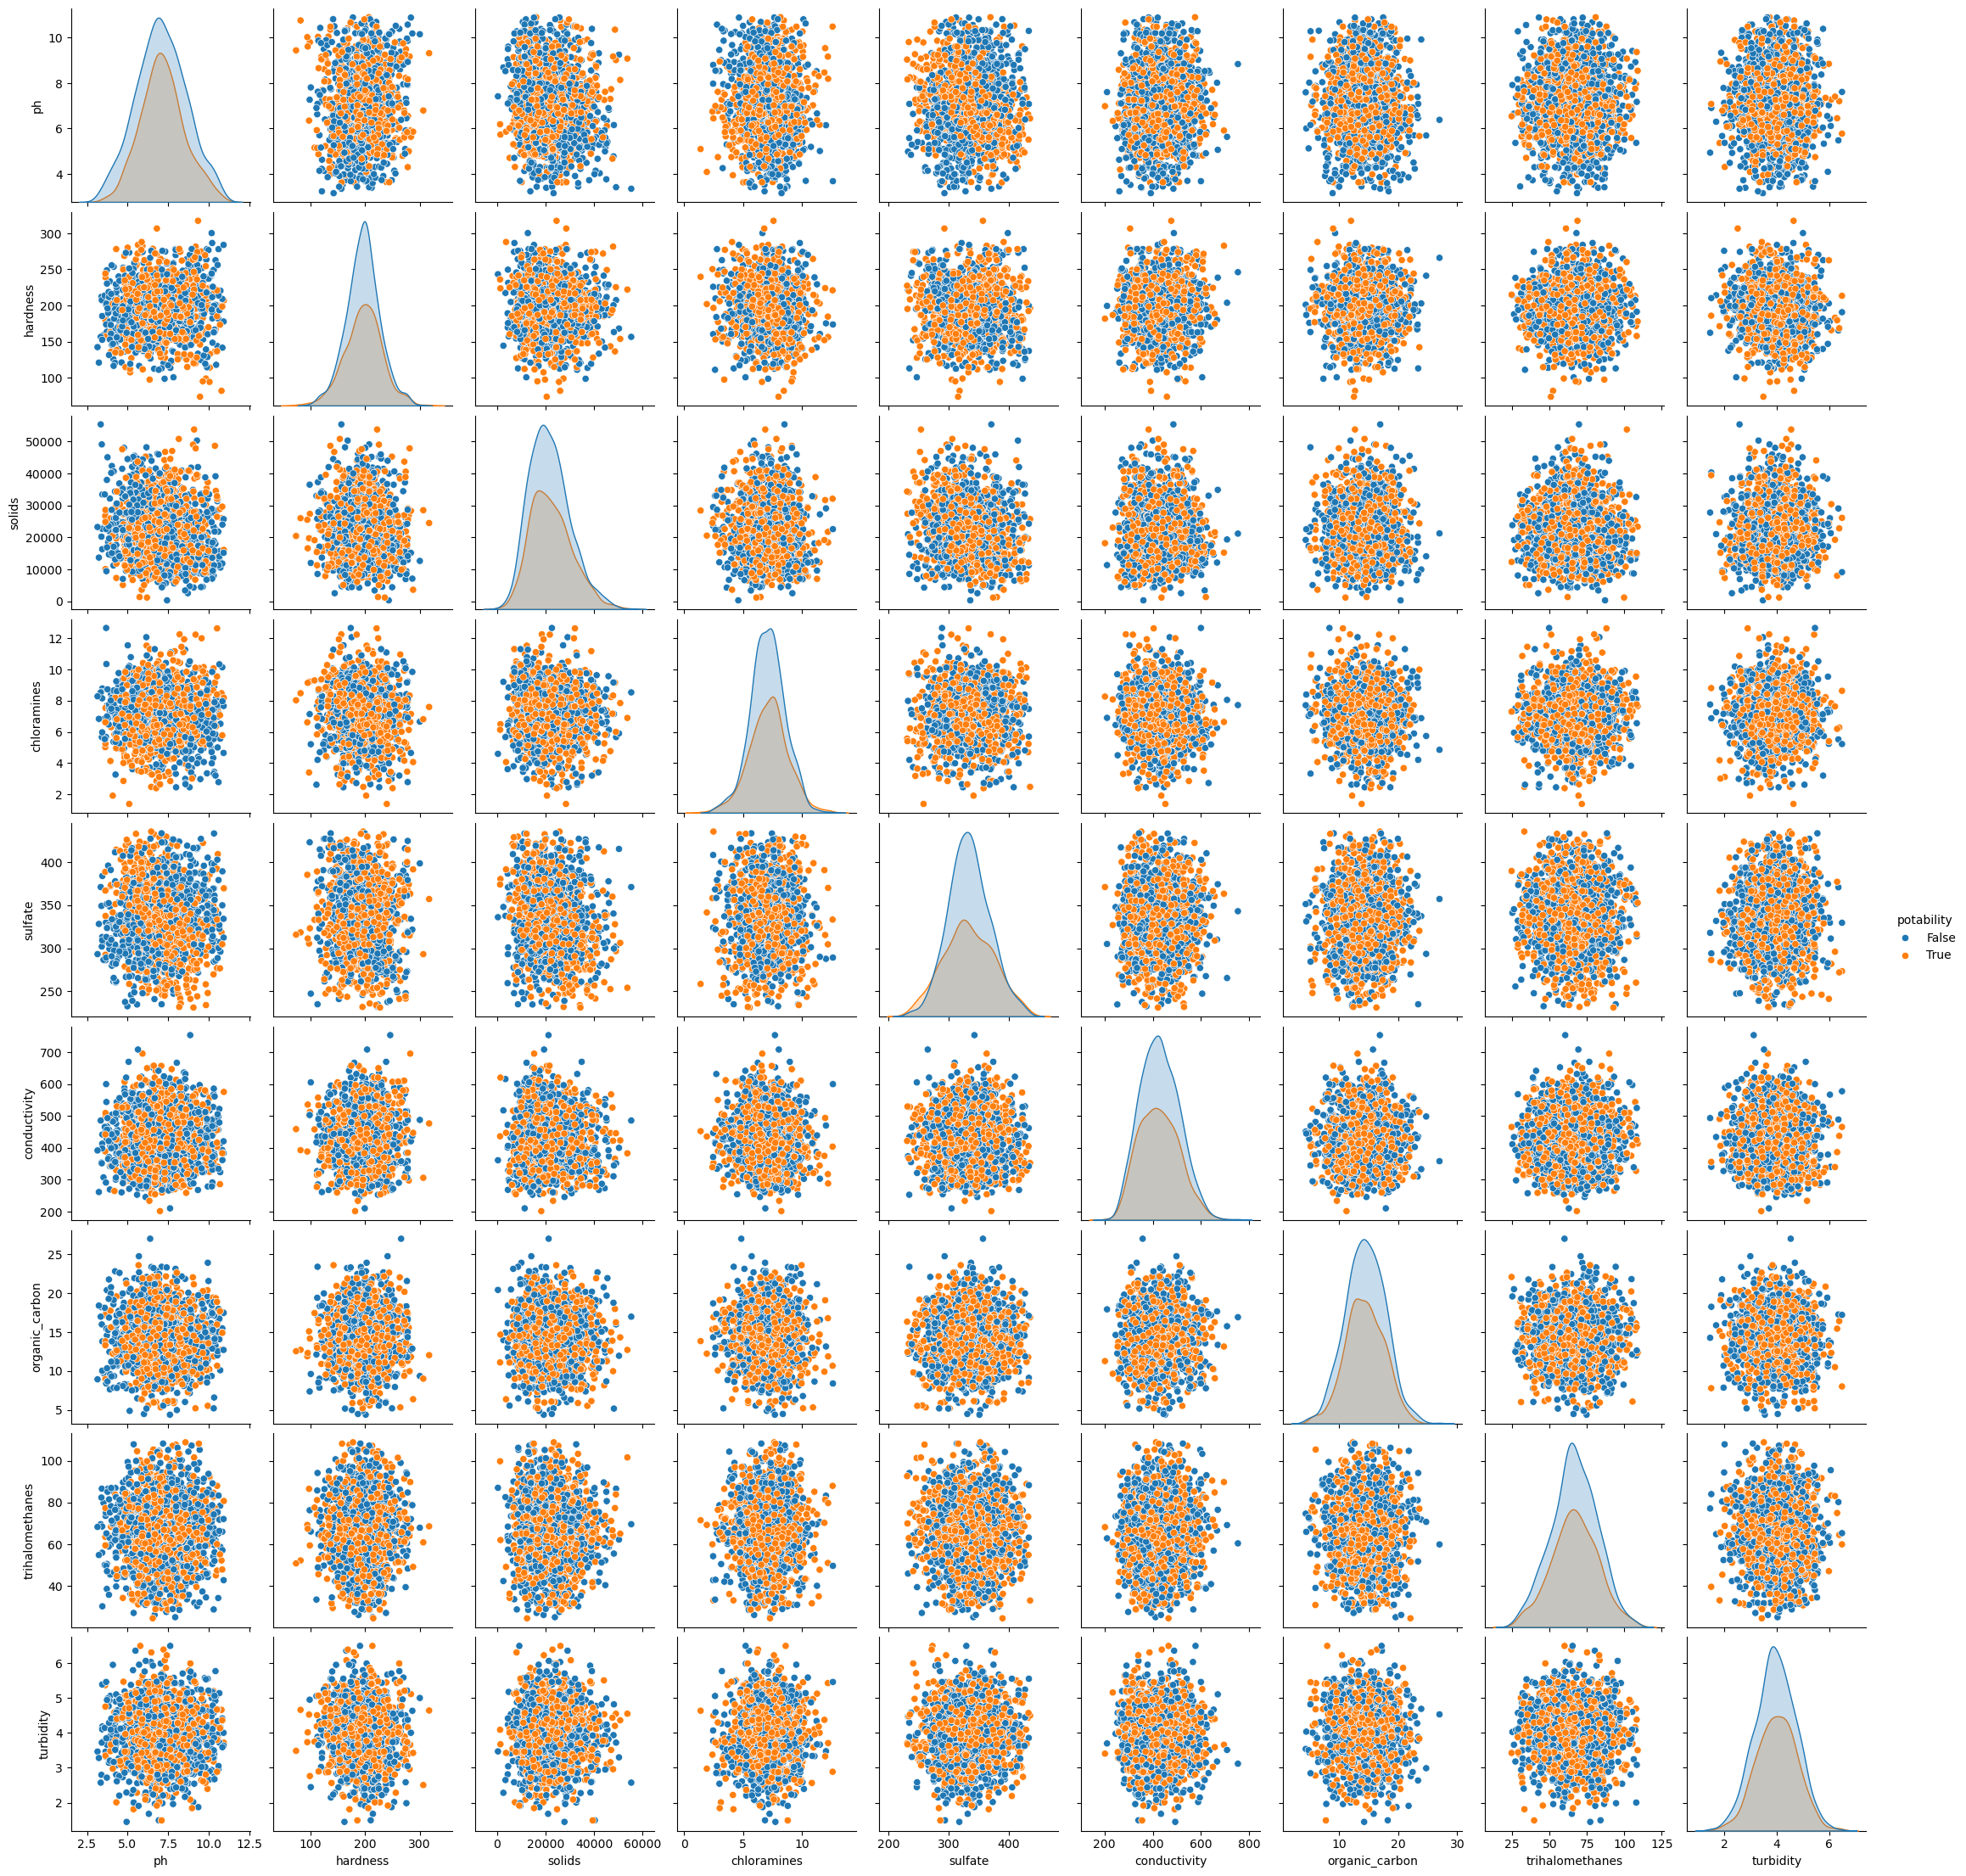

In [6]:
sns.pairplot(df, hue="potability")
plt.show()

In [7]:
columns = ["ph", "sulfate", "trihalomethanes"]

In [8]:
features = df[columns]
target = df["potability"]
X_train, X_test, y_train, y_test = train_test_split(features,  target, test_size=0.2, random_state=42)

In [9]:
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6145833333333334